In [1]:

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [2]:

# Update these paths to match your dataset structure
output_dir = r"C:\Users\User\Documents\tinos\Breast\output\dataset_split"
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode="rgb"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False
)


Found 5943 images belonging to 3 classes.
Found 2899 images belonging to 3 classes.


In [3]:

# Load VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base layers initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom classifier head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,846,787 (56.64 MB)

 Trainable params: 132,099 (516.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [4]:

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
    ModelCheckpoint("vgg16_breast.h5", save_best_only=True)
]

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    callbacks=callbacks
)


c:\Users\User\Documents\tinos\Breast\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3346 - loss: 1.2387

186/186 ━━━━━━━━━━━━━━━━━━━━ 647s 3s/step - accuracy: 0.3490 - loss: 1.1936 - val_accuracy: 0.5498 - val_loss: 1.0303 - learning_rate: 1.0000e-04
Epoch 2/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4103 - loss: 1.0902

186/186 ━━━━━━━━━━━━━━━━━━━━ 627s 3s/step - accuracy: 0.4232 - loss: 1.0772 - val_accuracy: 0.5492 - val_loss: 0.9919 - learning_rate: 1.0000e-04
Epoch 3/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4658 - loss: 1.0317

186/186 ━━━━━━━━━━━━━━━━━━━━ 636s 3s/step - accuracy: 0.4718 - loss: 1.0257 - val_accuracy: 0.6154 - val_loss: 0.9580 - learning_rate: 1.0000e-04
Epoch 4/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5169 - loss: 0.9955

186/186 ━━━━━━━━━━━━━━━━━━━━ 631s 3s/step - accuracy: 0.5268 - loss: 0.9874 - val_accuracy: 0.6216 - val_loss: 0.9297 - learning_rate: 1.0000e-04
Epoch 5/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5410 - loss: 0.9690

186/186 ━━━━━━━━━━━━━━━━━━━━ 573s 3s/step - accuracy: 0.5528 - loss: 0.9634 - val_accuracy: 0.6226 - val_loss: 0.9130 - learning_rate: 1.0000e-04
Epoch 6/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5601 - loss: 0.9454

186/186 ━━━━━━━━━━━━━━━━━━━━ 534s 3s/step - accuracy: 0.5662 - loss: 0.9433 - val_accuracy: 0.6313 - val_loss: 0.8920 - learning_rate: 1.0000e-04
Epoch 7/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5700 - loss: 0.9383

186/186 ━━━━━━━━━━━━━━━━━━━━ 540s 3s/step - accuracy: 0.5743 - loss: 0.9300 - val_accuracy: 0.6375 - val_loss: 0.8793 - learning_rate: 1.0000e-04
Epoch 8/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5914 - loss: 0.9116

186/186 ━━━━━━━━━━━━━━━━━━━━ 538s 3s/step - accuracy: 0.5889 - loss: 0.9145 - val_accuracy: 0.6523 - val_loss: 0.8632 - learning_rate: 1.0000e-04
Epoch 9/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5898 - loss: 0.9045

186/186 ━━━━━━━━━━━━━━━━━━━━ 539s 3s/step - accuracy: 0.5903 - loss: 0.9029 - val_accuracy: 0.6513 - val_loss: 0.8459 - learning_rate: 1.0000e-04
Epoch 10/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6013 - loss: 0.8863

186/186 ━━━━━━━━━━━━━━━━━━━━ 541s 3s/step - accuracy: 0.6066 - loss: 0.8869 - val_accuracy: 0.6485 - val_loss: 0.8338 - learning_rate: 1.0000e-04
Epoch 11/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6118 - loss: 0.8803

186/186 ━━━━━━━━━━━━━━━━━━━━ 542s 3s/step - accuracy: 0.6091 - loss: 0.8832 - val_accuracy: 0.6626 - val_loss: 0.8306 - learning_rate: 1.0000e-04
Epoch 12/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6360 - loss: 0.8620

186/186 ━━━━━━━━━━━━━━━━━━━━ 539s 3s/step - accuracy: 0.6211 - loss: 0.8683 - val_accuracy: 0.6761 - val_loss: 0.8114 - learning_rate: 1.0000e-04
Epoch 13/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6154 - loss: 0.8611

186/186 ━━━━━━━━━━━━━━━━━━━━ 539s 3s/step - accuracy: 0.6180 - loss: 0.8602 - val_accuracy: 0.6609 - val_loss: 0.8063 - learning_rate: 1.0000e-04
Epoch 14/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6343 - loss: 0.8528

186/186 ━━━━━━━━━━━━━━━━━━━━ 539s 3s/step - accuracy: 0.6320 - loss: 0.8521 - val_accuracy: 0.6854 - val_loss: 0.7935 - learning_rate: 1.0000e-04
Epoch 15/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6259 - loss: 0.8469

186/186 ━━━━━━━━━━━━━━━━━━━━ 538s 3s/step - accuracy: 0.6345 - loss: 0.8415 - val_accuracy: 0.6799 - val_loss: 0.7820 - learning_rate: 1.0000e-04
Epoch 16/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6318 - loss: 0.8440

186/186 ━━━━━━━━━━━━━━━━━━━━ 538s 3s/step - accuracy: 0.6342 - loss: 0.8415 - val_accuracy: 0.6764 - val_loss: 0.7789 - learning_rate: 1.0000e-04
Epoch 17/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6388 - loss: 0.8290

186/186 ━━━━━━━━━━━━━━━━━━━━ 551s 3s/step - accuracy: 0.6342 - loss: 0.8334 - val_accuracy: 0.6871 - val_loss: 0.7697 - learning_rate: 1.0000e-04
Epoch 18/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6396 - loss: 0.8283

186/186 ━━━━━━━━━━━━━━━━━━━━ 539s 3s/step - accuracy: 0.6429 - loss: 0.8261 - val_accuracy: 0.6913 - val_loss: 0.7614 - learning_rate: 1.0000e-04
Epoch 19/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6392 - loss: 0.8314

186/186 ━━━━━━━━━━━━━━━━━━━━ 538s 3s/step - accuracy: 0.6505 - loss: 0.8172 - val_accuracy: 0.6920 - val_loss: 0.7547 - learning_rate: 1.0000e-04
Epoch 20/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 539s 3s/step - accuracy: 0.6431 - loss: 0.8154 - val_accuracy: 0.6920 - val_loss: 0.7586 - learning_rate: 1.0000e-04


In [5]:

# Unfreeze last convolutional blocks for fine-tuning
for layer in base_model.layers[-8:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_ft = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    callbacks=callbacks
)


Epoch 1/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6697 - loss: 0.7626

186/186 ━━━━━━━━━━━━━━━━━━━━ 802s 4s/step - accuracy: 0.7141 - loss: 0.6775 - val_accuracy: 0.7216 - val_loss: 0.6302 - learning_rate: 1.0000e-05
Epoch 2/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7900 - loss: 0.5215

186/186 ━━━━━━━━━━━━━━━━━━━━ 799s 4s/step - accuracy: 0.8053 - loss: 0.4931 - val_accuracy: 0.8499 - val_loss: 0.3895 - learning_rate: 1.0000e-05
Epoch 3/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8423 - loss: 0.4146

186/186 ━━━━━━━━━━━━━━━━━━━━ 798s 4s/step - accuracy: 0.8380 - loss: 0.4092 - val_accuracy: 0.9024 - val_loss: 0.2708 - learning_rate: 1.0000e-05
Epoch 4/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8641 - loss: 0.3620

186/186 ━━━━━━━━━━━━━━━━━━━━ 798s 4s/step - accuracy: 0.8681 - loss: 0.3511 - val_accuracy: 0.9307 - val_loss: 0.2186 - learning_rate: 1.0000e-05
Epoch 5/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8891 - loss: 0.3088

186/186 ━━━━━━━━━━━━━━━━━━━━ 799s 4s/step - accuracy: 0.8923 - loss: 0.3003 - val_accuracy: 0.9314 - val_loss: 0.2029 - learning_rate: 1.0000e-05
Epoch 6/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 798s 4s/step - accuracy: 0.9012 - loss: 0.2673 - val_accuracy: 0.9248 - val_loss: 0.2290 - learning_rate: 1.0000e-05
Epoch 7/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9222 - loss: 0.2145

186/186 ━━━━━━━━━━━━━━━━━━━━ 839s 5s/step - accuracy: 0.9169 - loss: 0.2284 - val_accuracy: 0.9348 - val_loss: 0.1814 - learning_rate: 1.0000e-05
Epoch 8/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9171 - loss: 0.2244

186/186 ━━━━━━━━━━━━━━━━━━━━ 807s 4s/step - accuracy: 0.9293 - loss: 0.1995 - val_accuracy: 0.9579 - val_loss: 0.1259 - learning_rate: 1.0000e-05
Epoch 9/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 797s 4s/step - accuracy: 0.9433 - loss: 0.1736 - val_accuracy: 0.9352 - val_loss: 0.1776 - learning_rate: 1.0000e-05
Epoch 10/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 798s 4s/step - accuracy: 0.9451 - loss: 0.1560 - val_accuracy: 0.9345 - val_loss: 0.1872 - learning_rate: 1.0000e-05
Epoch 11/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9504 - loss: 0.1428

186/186 ━━━━━━━━━━━━━━━━━━━━ 798s 4s/step - accuracy: 0.9504 - loss: 0.1502 - val_accuracy: 0.9641 - val_loss: 0.1085 - learning_rate: 1.0000e-05
Epoch 12/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9512 - loss: 0.1470

186/186 ━━━━━━━━━━━━━━━━━━━━ 800s 4s/step - accuracy: 0.9473 - loss: 0.1551 - val_accuracy: 0.9741 - val_loss: 0.0855 - learning_rate: 1.0000e-05
Epoch 13/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 798s 4s/step - accuracy: 0.9643 - loss: 0.1161 - val_accuracy: 0.9738 - val_loss: 0.0904 - learning_rate: 1.0000e-05
Epoch 14/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9641 - loss: 0.1182

186/186 ━━━━━━━━━━━━━━━━━━━━ 799s 4s/step - accuracy: 0.9648 - loss: 0.1147 - val_accuracy: 0.9755 - val_loss: 0.0843 - learning_rate: 1.0000e-05
Epoch 15/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9678 - loss: 0.1022

186/186 ━━━━━━━━━━━━━━━━━━━━ 799s 4s/step - accuracy: 0.9625 - loss: 0.1078 - val_accuracy: 0.9859 - val_loss: 0.0545 - learning_rate: 1.0000e-05
Epoch 16/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9661 - loss: 0.1004

186/186 ━━━━━━━━━━━━━━━━━━━━ 799s 4s/step - accuracy: 0.9653 - loss: 0.1023 - val_accuracy: 0.9879 - val_loss: 0.0488 - learning_rate: 1.0000e-05
Epoch 17/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 800s 4s/step - accuracy: 0.9679 - loss: 0.1041 - val_accuracy: 0.9776 - val_loss: 0.0790 - learning_rate: 1.0000e-05
Epoch 18/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 797s 4s/step - accuracy: 0.9692 - loss: 0.0937 - val_accuracy: 0.9679 - val_loss: 0.0919 - learning_rate: 1.0000e-05
Epoch 19/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9710 - loss: 0.0867

186/186 ━━━━━━━━━━━━━━━━━━━━ 799s 4s/step - accuracy: 0.9753 - loss: 0.0770 - val_accuracy: 0.9869 - val_loss: 0.0378 - learning_rate: 1.0000e-05
Epoch 20/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 798s 4s/step - accuracy: 0.9722 - loss: 0.0855 - val_accuracy: 0.9862 - val_loss: 0.0481 - learning_rate: 1.0000e-05


91/91 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.9869 - loss: 0.0378
Test Accuracy: 98.69%
91/91 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step
              precision    recall  f1-score   support

      benign       0.99      0.98      0.98       959
   malignant       0.98      0.99      0.99       972
      normal       0.99      0.99      0.99       968

    accuracy                           0.99      2899
   macro avg       0.99      0.99      0.99      2899
weighted avg       0.99      0.99      0.99      2899



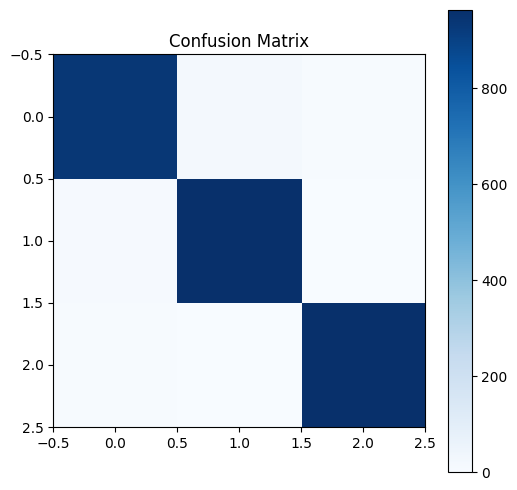

In [6]:

# Evaluate model
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc*100:.2f}%")

# Classification report
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,6))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()


In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Load your trained .h5 model
model = load_model("vgg16_breast.h5")

# Recompile (optional, for metrics/loss info)
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Save in .keras format
model.save("vgg16_breast.keras")


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Update path to match your dataset
test_dir = r"C:\Users\User\Documents\tinos\Breast\output\dataset_split\test"

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 2899 images belonging to 3 classes.


c:\Users\User\Documents\tinos\Breast\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


91/91 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step


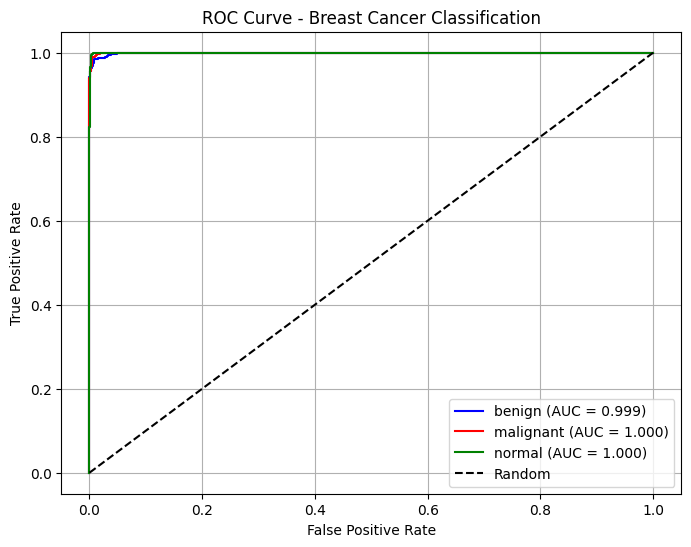

In [10]:
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model("vgg16_breast.h5")

# Now run the ROC curve code
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Get predictions and true labels
y_pred = model.predict(test_generator)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Binarize for multi-class ROC
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']

for i, color in enumerate(colors):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f'{class_names[i]} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Breast Cancer Classification')
plt.legend()
plt.grid(True)
plt.show()